In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr

end = datetime(2024, 8, 7, 11, 21, 24, 633194)
start = '2000-01-01'

# Fetch daily S&P 500 data
sp500_data = yf.download('^GSPC', start=start, end=end)

# Add technical indicators
sp500_data['Rsi'] = ta.rsi(sp500_data['Adj Close'], length=14)  # RSI with 14 periods
sp500_data['Ema_fast'] = ta.ema(sp500_data['Adj Close'], length=12)  # EMA with 12 periods
sp500_data['Ema_medium'] = ta.ema(sp500_data['Adj Close'], length=26)  # EMA with 26 periods
sp500_data['Ema_slow'] = ta.ema(sp500_data['Adj Close'], length=50)  # EMA with 50 periods
sp500_data['Sma_30'] = ta.sma(sp500_data['Adj Close'], length=30)  # SMA with 30 periods
sp500_data['Sma_200'] = ta.sma(sp500_data['Adj Close'], length=200)  # SMA with 200 periods

sp500_data['Bollinger_High'] = ta.bbands(sp500_data['Adj Close'], length=20, std=2)['BBU_20_2.0']
sp500_data['Bollinger_Low'] = ta.bbands(sp500_data['Adj Close'], length=20, std=2)['BBL_20_2.0']

sp500_data['ATR'] = ta.atr(sp500_data['High'], sp500_data['Low'], sp500_data['Adj Close'], length=14)
sp500_data['MACD'] = ta.macd(sp500_data['Adj Close'], fast=12, slow=26, signal=9)['MACD_12_26_9']

# Check the merged data
print(sp500_data.head())


[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   

                Volume  Rsi  Ema_fast  Ema_medium  Ema_slow  Sma_30  Sma_200  \
Date                                                                           
2000-01-03   931800000  NaN       NaN         NaN       NaN     NaN      NaN   
2000-01-04  1009000000  NaN       NaN         NaN       NaN     NaN      NaN   
2000-01-05  1085500000  NaN       NaN         NaN       NaN     NaN      NaN   
2000-01-06  1092300000  NaN       NaN         

In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# Set up End and Start times for data grab
end = end
start = '2000-01-01'

# Fetch adjusted close prices for Apple, Amazon, and Microsoft
tickers = ['AAPL', 'AMZN', 'MSFT', 'NVDA', 'GOOGL', 'TSLA', 'GOOG']
data = {}

for ticker in tickers:
    stock_data = yf.download(ticker, start=start, end=end)
    adj_close = stock_data['Adj Close']
    data[ticker] = adj_close.rename(ticker)

# Merge the data into a single DataFrame
merged_data = pd.concat(data.values(), axis=1)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
merged_data.dropna(inplace=True)
# Calculate daily returns for all columns and shift them by -1
for column in merged_data.columns:
    merged_data[f'{column} DR'] = merged_data[column].pct_change().shift(-1)

# Dropping any rows with NaN values after shifting (optional)
merged_data.dropna(inplace=True)

# Display the first few rows of the modified DataFrame
print(merged_data.head())


                AAPL    AMZN       MSFT      NVDA      GOOGL      TSLA  \
Date                                                                     
2010-06-29  7.726043  5.4305  17.745981  0.240313  11.354836  1.592667   
2010-06-30  7.586102  5.4630  17.517584  0.234122  11.122120  1.588667   
2010-07-01  7.494115  5.5480  17.631784  0.238020  10.985640  1.464000   
2010-07-02  7.447670  5.4570  17.715534  0.235039  10.912151  1.280000   
2010-07-06  7.498640  5.5030  18.134243  0.232517  10.900153  1.074000   

                 GOOG   AAPL DR   AMZN DR   MSFT DR   NVDA DR  GOOGL DR  \
Date                                                                      
2010-06-29  11.301231 -0.018113  0.005985 -0.012870 -0.025763 -0.020495   
2010-06-30  11.069613 -0.012126  0.015559  0.006519  0.016650 -0.012271   
2010-07-01  10.933779 -0.006198 -0.016402  0.004750 -0.012524 -0.006689   
2010-07-02  10.860637  0.006844  0.008430  0.023635 -0.010732 -0.001100   
2010-07-06  10.848695  0.040381

In [4]:

columns_to_drop = ['AAPL', 'AMZN', 'MSFT', 'NVDA', 'GOOGL', 'TSLA', 'GOOG']

# Drop the specified columns
merged_data.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the modified DataFrame
print(merged_data.head())

             AAPL DR   AMZN DR   MSFT DR   NVDA DR  GOOGL DR   TSLA DR  \
Date                                                                     
2010-06-29 -0.018113  0.005985 -0.012870 -0.025763 -0.020495 -0.002511   
2010-06-30 -0.012126  0.015559  0.006519  0.016650 -0.012271 -0.078473   
2010-07-01 -0.006198 -0.016402  0.004750 -0.012524 -0.006689 -0.125683   
2010-07-02  0.006844  0.008430  0.023635 -0.010732 -0.001100 -0.160937   
2010-07-06  0.040381  0.030620  0.020151  0.048323  0.032403 -0.019243   

             GOOG DR  
Date                  
2010-06-29 -0.020495  
2010-06-30 -0.012271  
2010-07-01 -0.006690  
2010-07-02 -0.001100  
2010-07-06  0.032403  


In [5]:

#merge the data
merged_data = pd.concat([sp500_data, merged_data], axis=1).dropna()
#add daily return
print(merged_data.shape)
print(merged_data.columns)


(3550, 23)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Rsi',
       'Ema_fast', 'Ema_medium', 'Ema_slow', 'Sma_30', 'Sma_200',
       'Bollinger_High', 'Bollinger_Low', 'ATR', 'MACD', 'AAPL DR', 'AMZN DR',
       'MSFT DR', 'NVDA DR', 'GOOGL DR', 'TSLA DR', 'GOOG DR'],
      dtype='object')


let's add some economic features to the dataset and see how PCA can help us to reduce the dimensionality of the data.

In [6]:
# Fetch economic data
gdp = pdr.get_data_fred('GDP', start=start, end=end) #quaterly
inflation = pdr.get_data_fred('CPIAUCSL', start=start, end=end)  # CPI for inflation
unemployment = pdr.get_data_fred('UNRATE', start=start, end=end)
interest_rate = pdr.get_data_fred('FEDFUNDS', start=start, end=end)

# Rename columns for clarity
gdp.rename(columns={'GDP': 'GDP'}, inplace=True)
inflation.rename(columns={'CPIAUCSL': 'Inflation'}, inplace=True)
unemployment.rename(columns={'UNRATE': 'Unemployment'}, inplace=True)
interest_rate.rename(columns={'FEDFUNDS': 'Interest_Rate'}, inplace=True)
GDP = gdp.resample('D').ffill()
Inflation = inflation.resample('D').ffill()
Unemployment = unemployment.resample('D').ffill()
Interest_rate = interest_rate.resample('D').ffill()

merged_data = merged_data.join([Inflation, Unemployment, Interest_rate, GDP], how='left')

print(merged_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Rsi',
       'Ema_fast', 'Ema_medium', 'Ema_slow', 'Sma_30', 'Sma_200',
       'Bollinger_High', 'Bollinger_Low', 'ATR', 'MACD', 'AAPL DR', 'AMZN DR',
       'MSFT DR', 'NVDA DR', 'GOOGL DR', 'TSLA DR', 'GOOG DR', 'Inflation',
       'Unemployment', 'Interest_Rate', 'GDP'],
      dtype='object')


In [7]:
#get the daily return
merged_data['Target'] = merged_data['Adj Close'].pct_change()
merged_data['Target'] = merged_data['Target'].shift(-1)


#merged_data['TargetNextClose'] = merged_data['Adj Close'].shift(-1) 

merged_data.dropna(inplace=True)
merged_data.reset_index(inplace = True)
Date = merged_data['Date']
merged_data.drop([ 'Date', 'Volume'], axis=1, inplace=True)
print(merged_data.head())

          Open         High          Low        Close    Adj Close        Rsi  \
0  1071.099976  1071.099976  1035.180054  1041.239990  1041.239990  33.885747   
1  1040.560059  1048.079956  1028.329956  1030.709961  1030.709961  31.856079   
2  1031.099976  1033.579956  1010.909973  1027.369995  1027.369995  31.217372   
3  1027.650024  1032.949951  1015.929993  1022.580017  1022.580017  30.279730   
4  1028.089966  1042.500000  1018.349976  1028.060059  1028.060059  32.767748   

      Ema_fast   Ema_medium     Ema_slow       Sma_30  ...   MSFT DR  \
0  1082.163101  1093.680490  1109.788007  1086.881995  ... -0.012870   
1  1074.247233  1089.016007  1106.686908  1083.878992  ...  0.006519   
2  1067.035350  1084.449635  1103.576440  1080.956323  ...  0.004750   
3  1060.196068  1079.866701  1100.400110  1079.322658  ...  0.023635   
4  1055.252067  1076.029172  1097.563245  1077.334996  ...  0.020151   

    NVDA DR  GOOGL DR   TSLA DR   GOOG DR  Inflation  Unemployment  \
0 -0.02576

<Axes: >

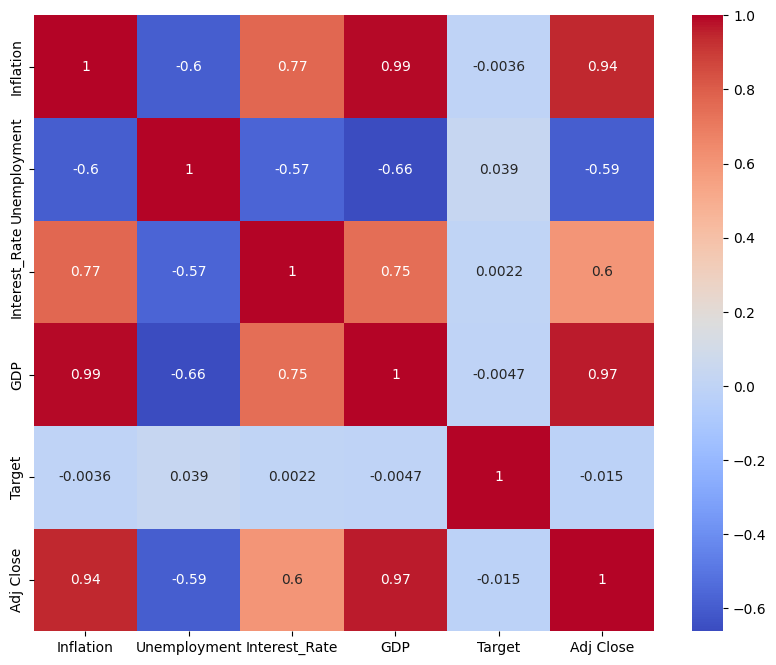

In [8]:
#sekect some columns
dd = merged_data[['Inflation', 'Unemployment', 'Interest_Rate', 'GDP', 'Target', 'Adj Close']]


import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(dd.corr(), annot=True, cmap='coolwarm')

not include the econocy indicators 

In [9]:
#drop 'Inflation', 'Unemployment', 'Interest_Rate', 'GDP',
merged_data.drop(['Inflation', 'Unemployment', 'Interest_Rate', 'GDP'], axis=1, inplace=True)
print(merged_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Rsi', 'Ema_fast',
       'Ema_medium', 'Ema_slow', 'Sma_30', 'Sma_200', 'Bollinger_High',
       'Bollinger_Low', 'ATR', 'MACD', 'AAPL DR', 'AMZN DR', 'MSFT DR',
       'NVDA DR', 'GOOGL DR', 'TSLA DR', 'GOOG DR', 'Target'],
      dtype='object')


In [10]:


features= merged_data.drop(['Target'], axis=1)
print(features.columns)
features = features.columns
print(features)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Rsi', 'Ema_fast',
       'Ema_medium', 'Ema_slow', 'Sma_30', 'Sma_200', 'Bollinger_High',
       'Bollinger_Low', 'ATR', 'MACD', 'AAPL DR', 'AMZN DR', 'MSFT DR',
       'NVDA DR', 'GOOGL DR', 'TSLA DR', 'GOOG DR'],
      dtype='object')


 need to scale the features in your data before applying PCA

In [12]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = merged_data.loc[:, features].values
# Separating out the target
y = merged_data.loc[:,['Target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [13]:
pd.DataFrame(data = x, columns = features).head()

,Open,High,Low,Close,Adj Close,Rsi,Ema_fast,Ema_medium,Ema_slow,Sma_30,...,Bollinger_Low,ATR,MACD,AAPL DR,AMZN DR,MSFT DR,NVDA DR,GOOGL DR,TSLA DR,GOOG DR
0,-1.423847,-1.428682,-1.451411,-1.451415,-1.451415,-1.937380,-1.413552,-1.401847,-1.384089,-1.406883,...,-1.424586,-0.455530,-0.638682,-1.088174,0.230145,-0.853761,-0.983836,-1.245124,-0.125649,-1.243657
1,-1.451776,-1.449615,-1.457712,-1.461043,-1.461043,-2.118367,-1.420818,-1.406148,-1.386967,-1.409654,...,-1.433214,-0.462328,-0.744563,-0.748105,0.693188,0.335679,0.513332,-0.766546,-2.250614,-0.765729
2,-1.460428,-1.462801,-1.473737,-1.464097,-1.464097,-2.175321,-1.427438,-1.410359,-1.389855,-1.412351,...,-1.441156,-0.459418,-0.830714,-0.411405,-0.852533,0.227145,-0.516501,-0.441732,-3.571291,-0.441372
3,-1.463583,-1.463374,-1.469119,-1.468476,-1.468476,-2.258931,-1.433716,-1.414584,-1.392804,-1.413858,...,-1.447945,-0.474561,-0.904192,0.329312,0.348383,1.385644,-0.453228,-0.116432,-4.557509,-0.116516
4,-1.463181,-1.454689,-1.466893,-1.463466,-1.463466,-2.037072,-1.438254,-1.418123,-1.395437,-1.415692,...,-1.451580,-0.466103,-0.940224,2.234163,1.421542,1.171932,1.631346,1.833205,-0.593701,1.830452


In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA with enough components to plot
pca = PCA(n_components=10)  # Adjust this number to the total number of components you want to analyze
principalComponents = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.56573918, 0.18984479, 0.0862934 , 0.03815999, 0.02822565,
       0.02291808, 0.02236202, 0.01921717, 0.01645796, 0.00991596])

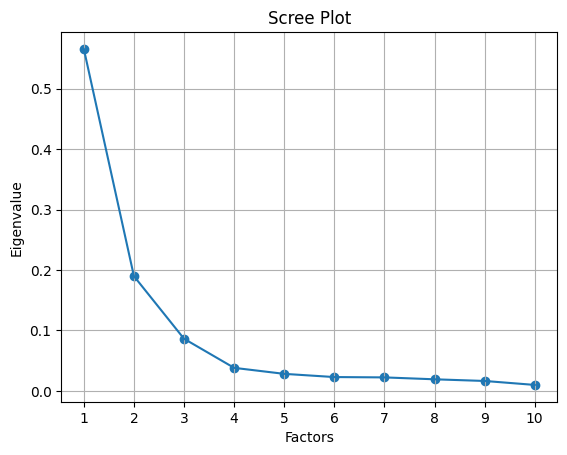

In [15]:
# Explained variance ratio
importance = pca.explained_variance_ratio_

# Scree plot
plt.scatter(range(1, len(importance) + 1), importance)
plt.plot(range(1, len(importance) + 1), importance)
plt.title('Scree Plot')
plt.xlabel('Factors')  # You may change this to 'Principal Components' if more appropriate
plt.ylabel('Eigenvalue')  # This could be 'Explained Variance Ratio' depending on context
plt.xticks(range(1, len(importance) + 1))
plt.grid(True)
plt.show()

In [16]:
pca = PCA(n_components=3)  # Adjust this number to the total number of components you want to analyze
principalComponents = pca.fit_transform(x)
print(sum(pca.explained_variance_ratio_))

0.8418773680179766


by look at the ratio and the plot, 3 principal components can explain 84% of the variance in the data.

In [31]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])
finalDf = pd.concat([principalDf, merged_data[['Target']]], axis = 1)
finalDf.head(5)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])
finalDf = pd.concat([principalDf, merged_data[['Target']]], axis = 1)
finalDf.head(5)

,PC1,PC2,PC3,Target
0,-4.916859,-2.069415,-1.807647,-0.010113
1,-4.945940,-0.891983,-2.022799,-0.003240
2,-4.958286,-1.799628,-2.172564,-0.004662
3,-4.983748,-0.562200,-2.267310,0.005359
4,-5.019517,3.879845,-1.825314,0.031331


we can see...

In [32]:
print(finalDf.head(5))
print(finalDf.shape)

        PC1       PC2       PC3    Target
0 -4.916859 -2.069415 -1.807647 -0.010113
1 -4.945940 -0.891983 -2.022799 -0.003240
2 -4.958286 -1.799628 -2.172564 -0.004662
3 -4.983748 -0.562200 -2.267310  0.005359
4 -5.019517  3.879845 -1.825314  0.031331
(3462, 4)


In [33]:
features= finalDf.drop(['Target'], axis=1)
features = features.columns
print(features)

Index(['PC1', 'PC2', 'PC3'], dtype='object')


使用普通的随机森林模型进行单步预测是一种常见的方法。随机森林是一个强大的机器学习算法，它能够处理非线性关系，并对于各种类型的数据都具有良好的预测性能。

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

N = 30 # using the past 30 days' data
features = finalDf[['PC1', 'PC2', 'PC3']].rolling(window=N).mean().shift(1).dropna()
target = finalDf[['PC1', 'PC2', 'PC3']].shift(-N).dropna()

# Only keep rows that exist in both features and target
features, target = features.align(target, join='inner')
features = features.dropna()
target = target.dropna()

X = features.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)


Mean Squared Error: 1.7075616436461118
Root Mean Squared Error: 1.3067370216099763
R-squared: 0.5412898123386839


Test Loss: 0.0008415352203883231, Test RMSE: 0.029009226709604263, Test MAE: 0.02265852317214012

Generalization Gap: There is still a generalization gap, but it’s more controlled now. This indicates that the model is learning, but the complexity might still be slightly high, or the data might be more challenging to generalize well.
Stabilization: Both metrics stabilize, which is a good sign that the model is not overfitting excessively.